---
안녕하세요 고목나무와 매미팀입니다 <br>
저희 프로젝트는 최근 화두가 되고 있는 **서울시 지하철역의 공실문제**를 4차산업시대에 맞게 스마트하고 친환경적으로 해결하고자 하는 데에서 출발했습니다<br>
아직 부족하지만 재미있게 읽어주시고 피드백이나 궁금한 사항들 댓글 남겨주시면 감사하겠습니다 :)

---

# 목차

**Intro: 들어가며**
    
**0. 라이브러리 및 데이터 불러오기** <br>
    
**1. 데이터 전처리** <br>
* 1.1 활용 데이터 
* 1.2 데이터 전처리
* 1.3 EDA

**2. 분석 프로세스** <br>
* 2.1 파생변수 생성 
* 2.2 Data Scaling
* 2.3 Clustering 
* 2.4 분석결과 요약
    
**3. 분석결과 및 군집별 대시보드** <br>
* 3.1 분석결과 해석
* 3.2 샐러드볼지수
* 3.3 군집별 대시보드
    
**4. 업무 활용 방안** <br>
* 4.1 공실 양극화 및 서울교통공사 적자 해소 
* 4.2 농산물 가격 변동폭 축소 및 안정적 공급
* 4.3 정책 활용 
* 4.4 고용 및 교육 프로그램 증대 
    
**5. 유형별 스마트팜 추천 입지** <br>
* 5.1 보급형 스마트팜 추천 입지
* 5.2 유통형 스마트팜 추천 입지
* 5.3 생산형 스마트팜 추천 입지
    
**6. 참고자료**    

# Intro: 들어가며
## <font size = 4><span style="color:#81B622">*'상가에 입주할 사람이 없어...'*</font>

계속되는 코로나 유행으로 서울 지하철역 내 상권의 경기가 쉽게 회복되지 않으면서, 지하상가 내 공실 문제가 더욱 심화되었습니다. 공실이 늘어나면서 발생하는 손실도 더욱 늘어만 가는 실정으로, 이러한 문제를 타개하기 위한 방안으로 최근 몇몇 역사 내 들어선 메트로팜에서 영감을 얻어 주제를 선정하게 되었습니다.저희 팀은 서울교통공사, 서울시민, 소상공인 관점에서 해당 주제에 접근했습니다.

<br>

현재 서울교통공사와 시민들, 소상공인이 직면한 <span style="color: Purple">**문제점**</span>은 다음 3가지 사항이 있습니다. <br>
    
* **서울시 역사 내 공실 양극화**
  * 코로나19의 여파로 서울 지하철역 지하상권의 경기가 쉽사리 회복되지 않고 있음
  * 입점 경쟁이 치열해 빈 가게가 하나도 없는 곳이 있는 반면, 빈 가게가 늘어나면서 그늘진 곳도 존재하는 실태
  * 2021년 3월 31일 기준 서울 지하철역 내 1600개 상가 중 공실은 391곳(**공실률 약 24.4%**)
  * 2020년 기준 서울 지하철 상가 공실로 발생한 **예상 손실 규모는 연 20억원** 가량 
  <br>
  <br>
* **농축산물 가격의 큰 변동성과 기상영향**
  * 농산물의 작황 및 생산량이 일정하지 않고, 가격의 등락도 반복되어 소비자인 국민의 안정적 먹거리 확보에 많은 어려움이 있음
  * <span style="color:#81B622">**'파테크'**</span>라는 신조어가 생길 정도로 농산물 시세의 변동성이 큰 실태
  * 농축수산물 가격은 전년대비 **9.7% 상승**했으며 농산물 가격 상승이 재료비 인상으로 이어지며 **서비스 가격도 1.7% 상승**하는 **연쇄적 인플레이션**을 초래
  * 작년 장마와 태풍, 올해 초 폭설 및 한파 등 기상요건에 의해 작황이 부진했던 것이 큰 영향 <br>
<br>
* **수요 대비 복잡한 유통구조과 큰 유통비용률**
  * 서울특별시는 전국에서 가장 인구가 많으면서 인구밀도가 높은 도시로 전국에서 농산물 소비량 또한 최대인 도시지만, 복잡한 유통구조와 높은 유통비용이 발생하는 실태
  * 생산자로부터 **직접** 공급하는 소비자는 겨우 **4.4%**
  * 생산자에서 소비자로 유통되는 과정에서 발생하는 **유통비용률**은 **47.5%**

<br>
다음과 같은 문제를 해결하고자 서울시 지하철 유동인구, 지하상가 임대정보, 소상공인 상가정보를 활용하여 분석하였습니다.


---

## 0. 라이브러리 및 데이터 불러오기

In [712]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyecharts
from pyecharts import *
from datetime import datetime
from IPython.display import Image
from pyecharts import Line
from pyecharts import Bar
from pyecharts import online
online()
import warnings
warnings.filterwarnings('ignore')

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for interactive visualizations
import geopandas as gpd
plt.rcParams['font.family'] = 'NanumGothic'
from sklearn.metrics import silhouette_samples, silhouette_score

# for Space visualization
from IPython.display import display
from IPython.display import HTML
import geopandas as gpd
import fiona   # 공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리
import pyproj
from fiona.crs import from_epsg

In [4]:
# Raw_Data 불러오기
file_subway_onoff = '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv'
file_subway_rent = "서울교통공사_지하상가임대정보_20210531.csv"
file_smartfarm = '서울교통공사_스마트팜 설치현황_20200930.csv'
file_store = "소상공인시장진흥공단_상가(상권)정보_서울_202106.csv"
file_subway = "서울교통공사_도시철도역사정보_20210409_1618459845117_52128.csv"
file_Nationwide_subway = "전국도시철도역사정보표준데이터.csv"

---

# 1. 데이터 전처리 및 통합데이터 생성

## 1.1 활용 데이터
   * 전국도시철도 역사정보 표준데이터
   <br>https://www.data.go.kr/data/15013205/standard.do 
   * 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보
   <br>https://data.seoul.go.kr/dataList/7/literacyView.do
   * 지하상가 임대정보
   <br>https://www.data.go.kr/data/15071329/fileData.do
   * 소상공인 상가정보
   <br>https://golmok.seoul.go.kr/regionAreaAnalysis.do
   * 서울교통공사 스마트팜 설치현황
   <br>https://www.data.go.kr/data/15044456/fileData.do#tab-layer-file

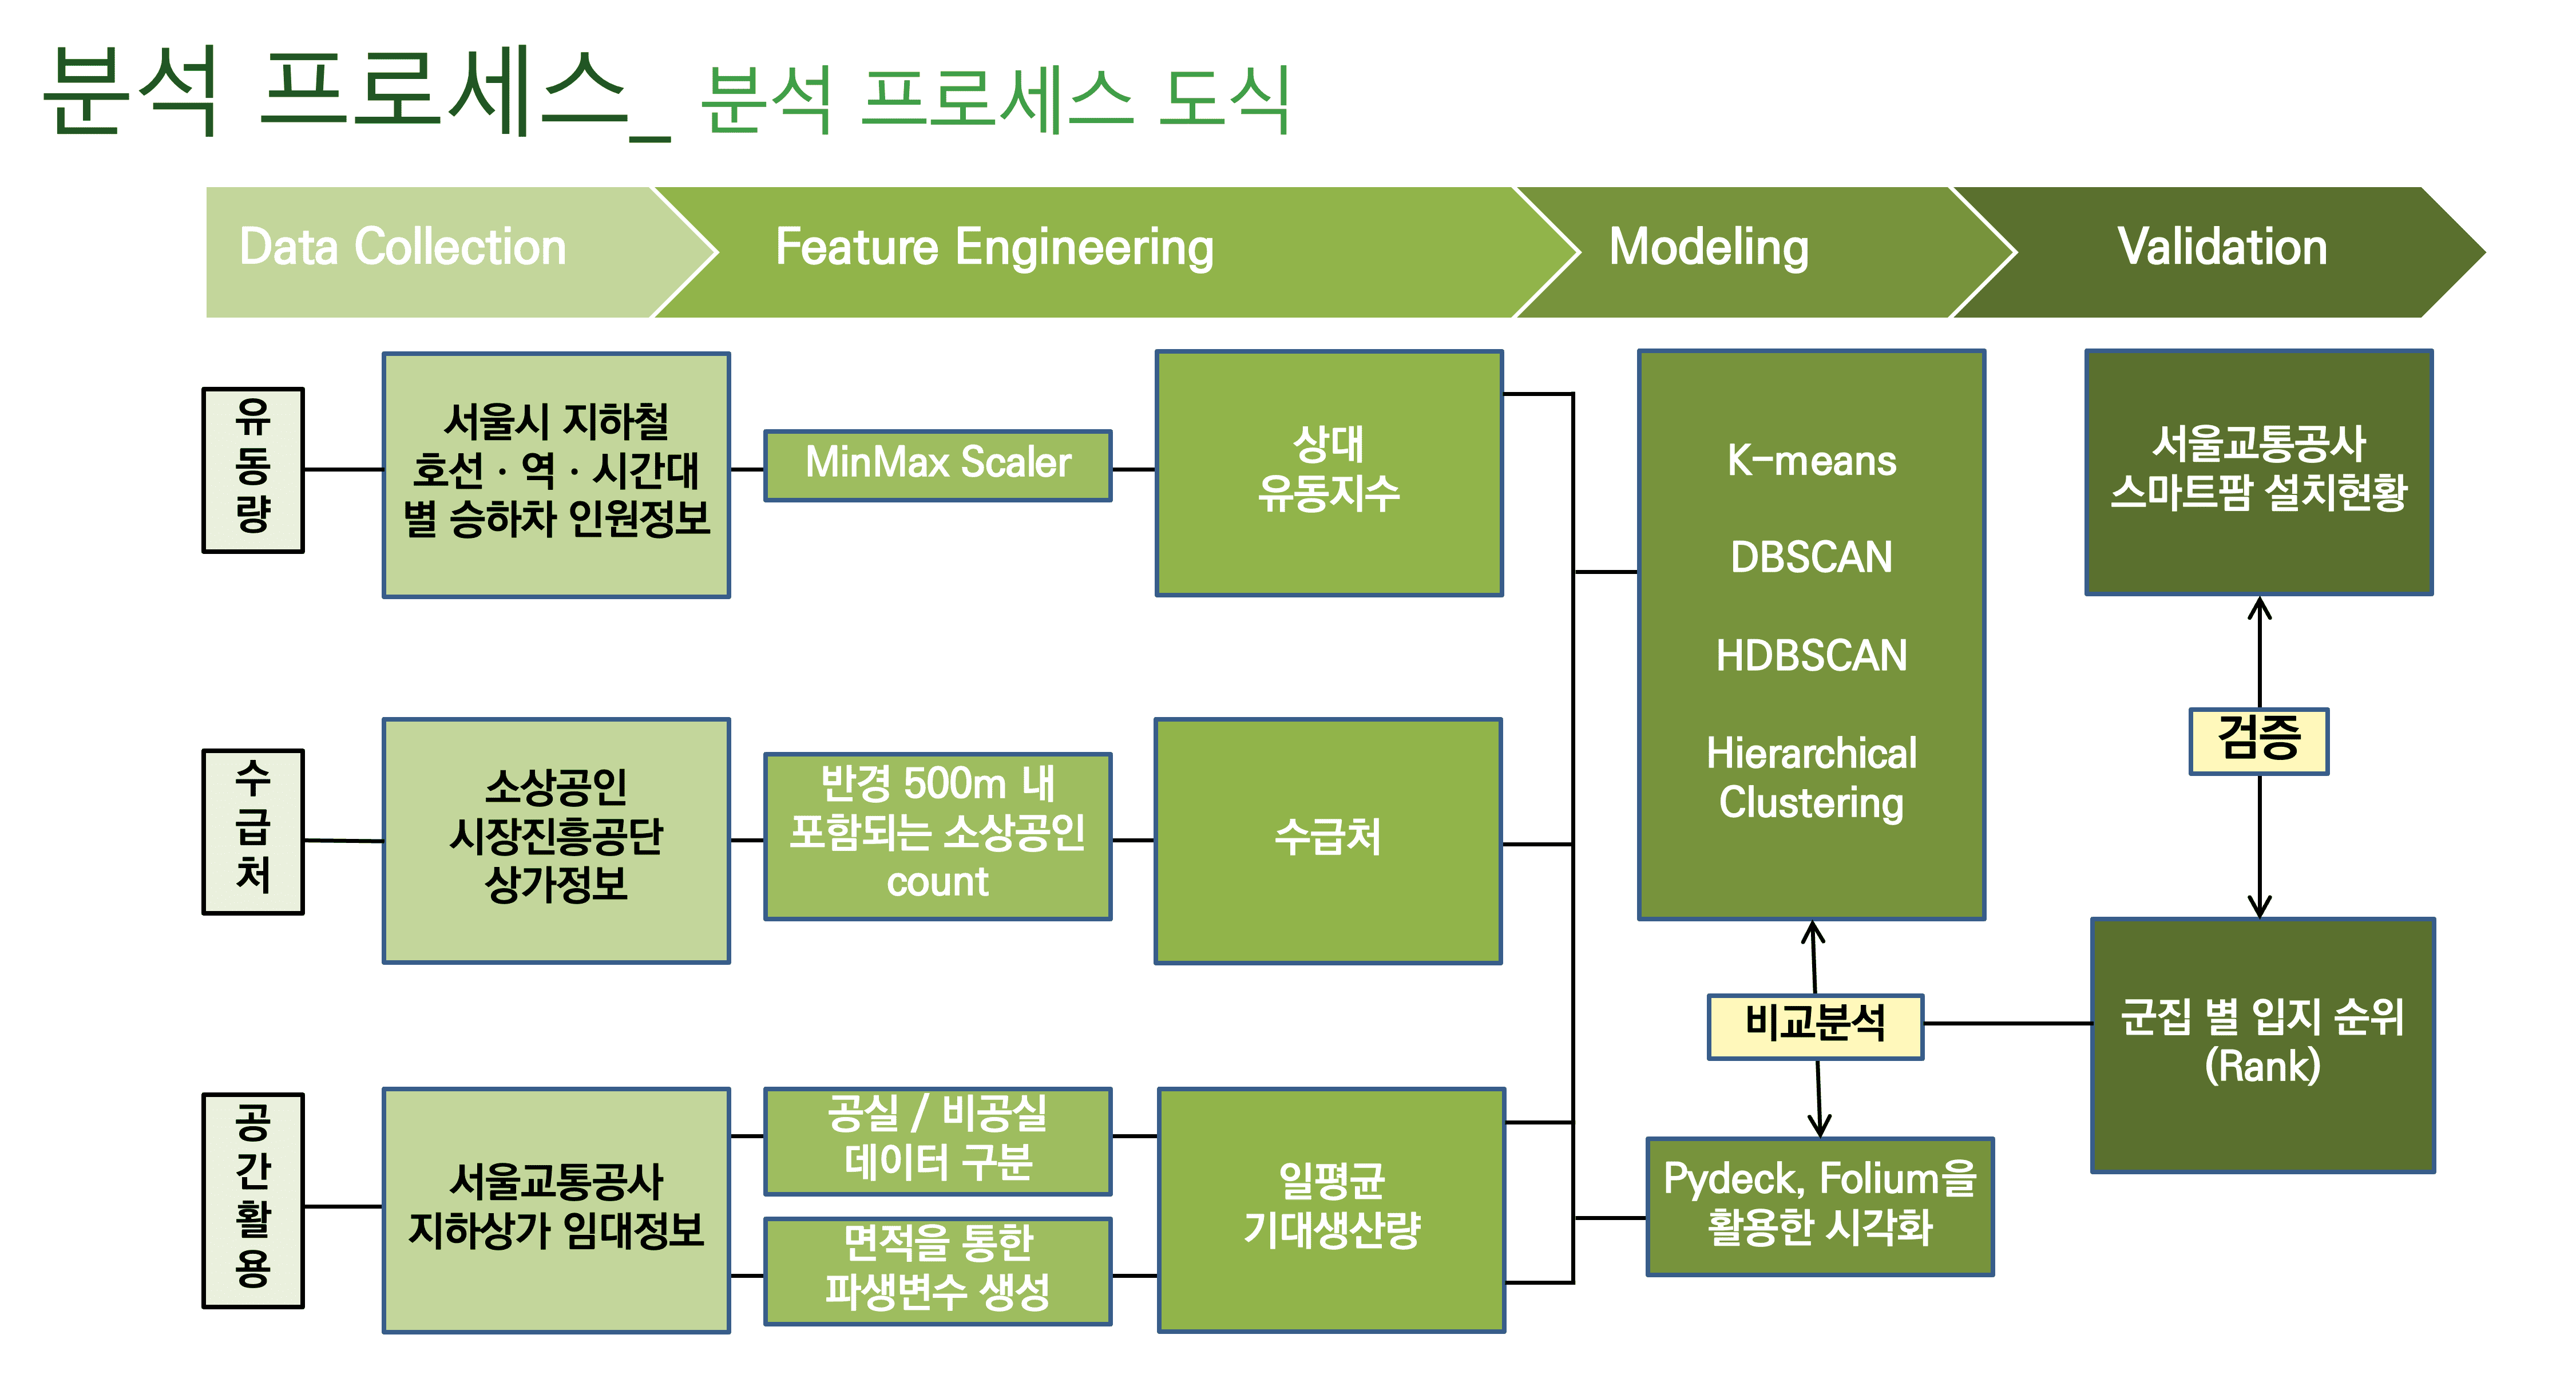

In [522]:
# 활용 데이터 및 분석 프로세스 소개
Image("analysis process.png")

## 1.2 데이터 전처리

### 1.2.1 전국도시철도역사정보표준데이터
전국도시철도역사정보데이터에서 서울시 지하철 역사명과 역위경도를 사용하고자 데이터를 불러왔습니다.

In [6]:
# 데이터 불러오기
Nationwide_subway = pd.read_csv(file_Nationwide_subway, encoding = 'euc-kr')

In [7]:
Nationwide_subway.head()

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자,제공기관코드,제공기관명
0,3122,부평삼거리,S2801,인천지하철 1호선,Bupyeongsamgeori,富平三거리,일반역,-,-,37.478267,126.710494,인천교통공사,인천광역시 부평구 경인로 765,032-516-3122,2020-11-30,B551894,인천교통공사
1,3123,간석오거리,S2801,인천지하철 1호선,Ganseogogeori,間石五거리,일반역,-,-,37.466921,126.707861,인천교통공사,인천광역시 남동구 경인로 674,032-434-3123,2020-11-30,B551894,인천교통공사
2,3124,인천시청,S2801,인천지하철 1호선,Incheon City Hall,仁川市廳,일반역,-,-,37.457615,126.702216,인천교통공사,인천광역시 남동구 예술로 264,032-441-3124,2020-11-30,B551894,인천교통공사
3,3125,예술회관,S2801,인천지하철 1호선,Arts Center,藝術會館,일반역,-,-,37.449334,126.700991,인천교통공사,인천광역시 남동구 예술로 172,032-441-3125,2020-11-30,B551894,인천교통공사
4,3126,인천터미널,S2801,인천지하철 1호선,Incheon Bus Terminal,仁川터미널,일반역,-,-,37.441917,126.699727,인천교통공사,인천광역시 미추홀구 예술로 85,032-441-3126,2020-11-30,B551894,인천교통공사


In [8]:
# 필요 컬럼만 추출
nat_subway = Nationwide_subway[["역사명", "역위도", "역경도","역사도로명주소"]].copy()
# 결측치 확인
nat_subway.isnull().sum()

역사명         0
역위도         0
역경도         0
역사도로명주소    29
dtype: int64

In [9]:
# 역사도로명주소가 결측치인 행 확인
nat_subway[nat_subway['역사도로명주소'].isnull()]

,역사명,역위도,역경도,역사도로명주소
1015,가양역,37.563176,126.854437,NaN
1016,가오리역,37.641644,127.016799,NaN
1017,개화역,37.578583,126.797482,NaN
1018,공항시장역,37.562554,126.808686,NaN
1019,구반포역,37.501601,126.987470,NaN
1020,국회의사당역,37.528332,126.917875,NaN
1021,노들역,37.513005,126.954082,NaN
1022,등촌역,37.551386,126.864492,NaN
1023,마곡나루역,37.566932,126.827329,NaN
1024,북한산보국문역,37.612437,127.008079,NaN


#### 전처리 1. 결측치 확인
역사도로명주소가 결측치인 데이터를 확인한 결과 **9호선, 북한산우이신설선**에 해당하는 역 데이터인 것을 확인했습니다. <br>
해당 역들은 모두 역사도로명주소가 서울시 인것을 확인한 후 역사도로명주소에 **서울**을 입력하여 주었습니다.

In [10]:
# 9호선, 우이신설선 도로명주소 서울로 입력
nat_subway["역사도로명주소"].fillna("서울", inplace = True)

In [11]:
# 역사도로명주소가 서울인 데이터만 추출
seoul_subway = nat_subway[nat_subway.역사도로명주소.str.contains('서울')].reset_index(drop=True)
seoul_subway

,역사명,역위도,역경도,역사도로명주소
0,동대문역사문화공원,37.565003,127.007394,서울특별시 중구 을지로 지하 279 (을지로7가)
1,신당,37.565829,127.018102,서울특별시 중구 퇴계로 지하 431-1 (신당동)
2,상왕십리,37.564171,127.029352,서울특별시 성동구 왕십리로 지하 374 (하왕십리동)
3,왕십리,37.561525,127.037508,서울특별시 성동구 왕십리로 지하300(행당동)
4,한양대,37.555222,127.043492,서울특별시 성동구 왕십리로 206 (행당동)
...,...,...,...,...
356,북한산우이역,37.663031,127.012752,서울
357,염창역,37.548701,126.874590,서울
358,정릉역,37.609220,127.014022,서울
359,4.19민주묘지역,37.652203,127.013537,서울


역사도로명주소기준 서울에 해당하는 역들에 대한 분석을 실시하고자 서울시내에 있는 역들만 추출했습니다.

#### 전처리 2. 역명 전처리 함수 생성
이후 다른 데이터와의 역사명을 통일시켜주어야 하기 때문에 이를 간편히 할 수 있는 함수를 만들었습니다.
<br>preprocess_subway_name 함수를 사용하여 앞으로 모든 데이터의 역명을 통일시켜줍니다.


* 역사명 뒤에 괄호가 붙는 경우<br>
<span style="color:#7F7F7F"> ex. 서울역(경의선) -> 서울역 <br>
* 역사명에 '역'이 붙는 경우와 아닌 경우<br>
    <span style="color:#7F7F7F"> ex. 강남 -> 강남역

In [12]:
# 함수 생성
def preprocess_subway_name(data, col):
    data[col] = data[col].replace('\([^)]*\)',"",regex=True)
    data[col] = data[col].str.replace(" ", "")
    data[col] = data[col].str.rstrip("역")
    data[col]+="역"

In [13]:
# 역사명 통일시켜주기
preprocess_subway_name(seoul_subway,'역사명')

In [14]:
seoul_subway

,역사명,역위도,역경도,역사도로명주소
0,동대문역사문화공원역,37.565003,127.007394,서울특별시 중구 을지로 지하 279 (을지로7가)
1,신당역,37.565829,127.018102,서울특별시 중구 퇴계로 지하 431-1 (신당동)
2,상왕십리역,37.564171,127.029352,서울특별시 성동구 왕십리로 지하 374 (하왕십리동)
3,왕십리역,37.561525,127.037508,서울특별시 성동구 왕십리로 지하300(행당동)
4,한양대역,37.555222,127.043492,서울특별시 성동구 왕십리로 206 (행당동)
...,...,...,...,...
356,북한산우이역,37.663031,127.012752,서울
357,염창역,37.548701,126.874590,서울
358,정릉역,37.609220,127.014022,서울
359,4.19민주묘지역,37.652203,127.013537,서울


#### 전처리 3. 동일 역명 및 환승역 처리
seoul_subway 데이터에서 전처리해야 할 주요사항으로 **중복역과 환승역**이 있었습니다.

<br>환승역은 역위경도 값이 호선수 만큼 나오기 때문에 해당 역의 위경도의 평균값을 사용했습니다.
<br>중복역은 4호선 이수(총신대입구)역 같은 경우 같은 역이지만 다른 행에 표기된 경우입니다. 중복을 피하고자 같은 역에 해당하는 역들에 대해 전처리를 진행했습니다.

In [15]:
# 유니크한 역사명 개수 확인
len(seoul_subway['역사명'].unique())

296

In [16]:
# 동일역이지만 다르게 표기된 역 확인
seoul_subway[(seoul_subway['역사명']=='이수역')|(seoul_subway['역사명']=='총신대입구역')]

,역사명,역위도,역경도,역사도로명주소
177,총신대입구역,37.486782,126.981945,서울특별시 동작구 동작대로 지하 117 (사당동)
295,이수역,37.486582,126.981745,서울특별시 동작구 사당로 지하310 (사당동)


In [17]:
# 이수,총신대입구 위경도 평균
이수위경도 = seoul_subway[(seoul_subway['역사명']=='이수')|(seoul_subway['역사명']=='총신대입구')].mean()
seoul_subway.loc[295,['역위도','역경도']] = 이수위경도

# 총신대입구 drop
seoul_subway.drop(177,inplace=True)
seoul_subway.reset_index(drop=True,inplace=True)

In [18]:
# 유니크한 역사명 개수 확인
len(seoul_subway['역사명'].unique())

295

In [19]:
# 환승역 확인
transfer = seoul_subway.groupby(['역사명']).count()
transfer[transfer['역위도']>1].index

Index(['가락시장역', '가산디지털단지역', '강남구청역', '건대입구역', '고속터미널역', '공덕역', '교대역', '군자역',
       '김포공항역', '까치산역', '노원역', '대림역', '도곡역', '도봉산역', '동대문역', '동대문역사문화공원역',
       '동묘앞역', '디지털미디어시티역', '불광역', '사당역', '삼각지역', '상봉역', '서울역', '석계역', '석촌역',
       '선릉역', '선정릉역', '수서역', '시청역', '신길역', '신내역', '신당역', '신도림역', '신설동역', '신촌역',
       '약수역', '연신내역', '영등포구청역', '오금역', '옥수역', '온수역', '올림픽공원역', '왕십리역',
       '을지로3가역', '을지로4가역', '이촌역', '잠실역', '종로3가역', '종합운동장역', '창동역', '천호역',
       '청구역', '청량리역', '충무로역', '충정로역', '태릉입구역', '합정역', '홍대입구역', '효창공원앞역'],
      dtype='object', name='역사명')

In [20]:
# 환승역 위경도 평균
seoul_subway = seoul_subway.groupby("역사명",as_index = False).mean()
seoul_subway

,역사명,역위도,역경도
0,4.19민주묘지역,37.652203,127.013537
1,가락시장역,37.492844,127.117987
2,가산디지털단지역,37.481393,126.882605
3,가양역,37.563176,126.854437
4,가오리역,37.641644,127.016799
...,...,...,...
290,화랑대역,37.620131,127.084426
291,회기역,37.589802,127.057936
292,회현역,37.558517,126.978130
293,효창공원앞역,37.539416,126.961355


서울시내에 있는 역의 개수는 최종 295개로 집계가 되었습니다.

### 1.2.2 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보
서울시 지하철 유동인구에 대한 분석을 진행하고자 다음 데이터를 활용했습니다.

In [21]:
# 데이터 읽기
subway_onoff = pd.read_csv(file_subway_onoff, encoding = 'euc-kr')
subway_onoff

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45333,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
45334,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
45335,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
45336,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


#### 전처리 1. 컬럼 전처리
* 사용하는 컬럼 걸러내기
* seoul_subway 데이터와 컬럼명을 통일했습니다
<br><span style="color:#7F7F7F"> ex. 지하철역 -> 역사명 <br>
* 코로나 전후 2개년, 총 4개년 데이터를 사용했습니다. (18년-21년)


In [22]:
# 필요없는 컬럼 제거
subway_onoff.drop(columns='작업일자',inplace=True)

# 2021년 7월까지 코로나 전후로 2개년씩 총 4개년 데이터 사용
subway_onoff = subway_onoff[subway_onoff['사용월']>=201806]

In [23]:
# 컬럼명 통일
subway_onoff.rename(columns={'지하철역':'역사명'},inplace=True)

In [24]:
# 지하철 역별 전체 sum 확인
subway_onoff.groupby(['역사명','호선명']).sum()

사용월  04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  \
역사명       호선명                                                        
4.19민주묘지  우이신설선  7472240           287            79         48025   
가능        경원선    7472240         14637           234        289083   
가락시장      3호선    7472240           458            14         96968   
          8호선    7472240           686            10         95463   
가산디지털단지   7호선    7472240         24628           122        281906   
...                  ...           ...           ...           ...   
회룡        경원선    7472240         36942           757        511740   
회현(남대문시장) 4호선    7472240          1545            41         80017   
효창공원앞     6호선    7472240           209             4         87130   
          경의선    7472240           120             4         23338   
흑석(중앙대입구) 9호선    7472240           309            13        120884   

                 05시-06시 하차인원  06시-07시 승차인원  06시-07시 하차인원  07시-08시 승차인원  \
역사명       호선명                                                             
4.19민주묘지  우이신설선          9529        108311         36950        268600   
가능        경원선           62379        453432        164143        897192   
가락시장      3호선           23116        260797        192653        768506   
          8호선           82515        182674        229078        360318   
가산디지털단지   7호선          193865        332377        795296        733890   
...                       ...           ...           ...           ...   
회룡        경원선           73378        932027        231369       2077640   
회현(남대문시장) 4호선           32677        133288        794810        209357   
효창공원앞     6호선           22330        179330        150577        558609   
          경의선            8141         65441         75007        161919   
흑석(중앙대입구) 9호선           35906        207201        212654        587704   

                 07시-08시 하차인원  08시-09시 승차인원  ...  23시-24시 승차인원  23시-24시 하차인원  \
역사명       호선명                                ...                               
4.19민주묘지  우이신설선         59037        306223  ...         19366         86384   
가능        경원선          187830        844945  ...         51616        247432   
가락시장      3호선          379309        891859  ...         95557        237750   
          8호선          476250        482638  ...        141881        170735   
가산디지털단지   7호선         3811485        832658  ...        500330        258965   
...                       ...           ...  ...           ...           ...   
회룡        경원선          281574       1703791  ...         60529        450165   
회현(남대문시장) 4호선         1936441        335816  ...        196433        157984   
효창공원앞     6호선          252188        905837  ...         80515        175561   
          경의선          155959        223591  ...         36819         82298   
흑석(중앙대입구) 9호선          405684        773695  ...        173413        296835   

                 00시-01시 승차인원  00시-01시 하차인원  01시-02시 승차인원  01시-02시 하차인원  \
역사명       호선명                                                             
4.19민주묘지  우이신설선          2995         17550             8           150   
가능        경원선            3917         62285             3            58   
가락시장      3호선           10358         69961            48          1525   
          8호선           19909         79813            79         12411   
가산디지털단지   7호선           48588         75356           103           327   
...                       ...           ...           ...           ...   
회룡        경원선            5974        159144             3            75   
회현(남대문시장) 4호선           20714         45104           158          3290   
효창공원앞     6호선            8961         55282            74           316   
          경의선            2731         17041             1            12   
흑석(중앙대입구) 9호선           28393         67806            78          2159   

                 02시-03시 승차인원  02시-03시 하차인원  03시-04시 승차인원  03시-04시 하차인원  
역사명       호선명                              

#### 전처리 2. 역 전처리
* 환승역의 경우 해당 역 유동인구 합을 보고자 같은 역에 대해 호선별 sum을 했습니다.<br>
* 이후 전에 작성했던 역사명 통일 함수를 통해 다른 데이터와 역명을 통일 시켜 주었습니다.
* 이수역/총신대입구역과 같은 중복역 처리를 했습니다

In [25]:
# 환승역의 경우 호선별 통합 (환승역에서 중복되는 호선의 value값이 0인 경우가 존재)
subway_onoff = subway_onoff.groupby(['사용월','역사명'],as_index=False).sum()

In [27]:
# 위 함수를 사용해 역사명 통일시켜주기
preprocess_subway_name(subway_onoff,'역사명')

In [28]:
# 중복역 확인 및 제거
subway_onoff[(subway_onoff.역사명=='이수역')|(subway_onoff.역사명=='총신대입구역')]

,사용월,역사명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
397,201806,이수역,30,2,5756,1215,10742,10026,29804,15195,...,15890,12908,2869,4450,0,67,0,0,0,0
460,201806,총신대입구역,79,2,8341,941,20145,11224,53246,21776,...,13347,21610,1782,5723,1,209,0,0,0,0
900,201807,이수역,27,1,5726,1227,10955,10325,31371,16046,...,16588,12518,3209,4356,0,100,0,0,0,0
963,201807,총신대입구역,79,2,8127,975,20347,11281,55672,22103,...,13549,20642,1970,5746,1,102,0,0,0,0
1403,201808,이수역,37,1,5428,1105,10262,9602,29423,15409,...,15690,12100,2896,4118,2,109,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17810,202104,총신대입구역,75,2,5727,839,15463,11117,46534,18108,...,2334,9272,1,46,0,0,0,0,0,0
18265,202105,이수역,51,0,4288,998,8286,8646,24116,13523,...,4054,6852,7,499,0,0,0,0,0,0
18329,202105,총신대입구역,106,3,5782,792,14964,10251,41243,16373,...,2528,9738,4,119,0,0,0,0,0,0
18785,202106,이수역,23,0,4625,1044,8971,9219,27027,14632,...,4545,7306,7,561,0,0,0,0,0,0


In [29]:
# 총신대입구역을 이수역으로 역명 통일
이수역 = subway_onoff[(subway_onoff.역사명=='이수역')|(subway_onoff.역사명=='총신대입구역')].index

for i in 이수역:
    subway_onoff.loc[i, '역사명'] = '이수역'

In [30]:
# 총신대입구 삭제된 것 확인하기
subway_onoff[subway_onoff['역사명']=='총신대입구역'] #삭제완료

,사용월,역사명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원


In [31]:
len(subway_onoff.역사명.unique())

520

#### 전처리 3. 서울 내 존재하는 역의 유동인구만 추출
* 연도별 유동인구 데이터셋 subway_group과 서울지하철역 위경도 데이터셋 seoul_subway을 merge 했습니다.
* 서울에 존재하는 역에 대한 유동인구만 추출했습니다

In [627]:
# 서울시내 지하철 데이터 seoul_subway에 없는 역 확인 
print(set(subway_onoff['역사명'].unique())-set(seoul_subway['역사명'].unique()))

{'안양역', '수진역', '구리역', '산본역', '마석역', '신길온천역', '두정역', '도심역', '가천대역', '상록수역', '오산대역', '주안역', '선바위역', '오산역', '탄현역', '화전역', '부평구청역', '숭의역', '대공원역', '도화역', '부천시청역', '별내역', '석수역', '호구포역', '광명사거리역', '과천역', '덕계역', '수원시청역', '철산역', '금촌역', '의정부역', '판교역', '신원역', '소래포구역', '부천종합운동장역', '신포역', '동두천역', '세종대왕릉역', '월롱역', '서정리역', '양주역', '임진강역', '영통역', '세마역', '송탄역', '신창역', '수원역', '곤지암역', '동두천중앙역', '신중동역', '구성역', '군포역', '중동역', '공항화물청사역', '성환역', '문산역', '천마산역', '원인재역', '매교역', '송도역', '경기광주역', '부발역', '평택지제역', '화정역', '사릉역', '파주역', '청명역', '까치울역', '녹양역', '단대오거리역', '영종역', '팔당역', '연수역', '원당역', '태평역', '굴포천역', '정자역', '아산역', '백마역', '소요산역', '망월사역', '병점역', '신흥역', '오목천역', '관악역', '지평역', '고색역', '서동탄역', '금릉역', '오이도역', '송내역', '사리역', '남동인더스파크역', '월곶역', '진위역', '춘의역', '소사역', '세류역', '평내호평역', '어천역', '삼동역', '능곡역', '동인천역', '굴봉산역', '주엽역', '화서역', '인천논현역', '달월역', '곡산역', '증미역', '청평역', '반월역', '죽전역', '기흥역', '가능역', '아신역', '김유정역', '장암역', '동암역', '지축역', '덕소역', '수내역', '강일역', '갈매역', '남춘천역', '백운역', '쌍용역', '양수역', '부평역', '봉명역', '망포역', '매탄권선역', '평택역

In [33]:
# 서울시내 지하철 데이터와 inner merge
sub_onoff = pd.merge(subway_onoff,seoul_subway,how='inner', on='역사명').drop(columns=['역위도','역경도'])
sub_onoff

,사용월,역사명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,201806,4.19민주묘지역,12,0,1574,311,2909,1396,7295,1955,...,719,2882,135,770,0,4,0,0,0,0
1,201807,4.19민주묘지역,16,1,1584,415,3187,1536,7894,1803,...,460,2814,126,769,0,7,0,0,0,0
2,201808,4.19민주묘지역,12,2,1534,369,3189,1471,7452,1732,...,538,2896,111,811,0,2,0,0,0,0
3,201809,4.19민주묘지역,14,4,1478,341,2764,1245,7189,1869,...,683,2881,101,820,0,10,0,2,0,0
4,201810,4.19민주묘지역,9,1,1384,408,3403,1299,8351,2067,...,795,3032,140,749,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10911,202102,한성백제역,0,0,530,91,1731,1200,4743,1306,...,236,1005,1,30,0,0,0,0,0,0
10912,202103,한성백제역,0,0,763,163,2445,1314,6512,1600,...,326,1604,0,34,0,0,0,0,0,0
10913,202104,한성백제역,0,0,725,195,2549,1104,6621,1715,...,299,1522,0,12,0,0,0,0,0,0
10914,202105,한성백제역,0,0,745,192,2469,953,6040,1603,...,335,1581,0,51,0,0,0,0,0,0


#### 전처리 4. 연도별로 데이터 분리
* 연도별로 시간대별 유동인구 평균을 보고자 날짜를 datetime으로 변환 후 연도만 뽑아왔습니다.
* 연도별 시간대별 평균으로 집계를 했습니다.
<br><span style="color:#7F7F7F"> subway_18
<br><span style="color:#7F7F7F"> subway_19
<br><span style="color:#7F7F7F"> subway_20
<br><span style="color:#7F7F7F"> subway_21

In [34]:
# 연도별 시간대별 평균 구하기 위해 datetime으로 변환 후 연도 뽑아오기
subway_group = sub_onoff.copy()
subway_group.insert(1,'년',pd.to_datetime(subway_group['사용월'], format="%Y%m").dt.year)
subway_group.drop(columns=['사용월'],inplace=True)

# 연도별 역별 시간대별 평균
subway_group = round(subway_group.groupby(['년','역사명'],as_index=False).mean())

In [35]:
subway_group

,년,역사명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,2018,4.19민주묘지역,15.0,3.0,1492.0,368.0,3074.0,1280.0,7656.0,1855.0,...,672.0,2879.0,125.0,801.0,0.0,7.0,0.0,1.0,0.0,0.0
1,2018,가락시장역,34.0,1.0,5638.0,2776.0,12973.0,11785.0,34781.0,23946.0,...,8634.0,14690.0,1328.0,5281.0,7.0,604.0,0.0,16.0,0.0,0.0
2,2018,가산디지털단지역,2017.0,9.0,16953.0,6559.0,19142.0,30482.0,36463.0,140796.0,...,26667.0,16181.0,2464.0,4183.0,7.0,23.0,0.0,3.0,0.0,0.0
3,2018,가양역,93.0,0.0,14757.0,1546.0,27936.0,9920.0,79808.0,25062.0,...,4846.0,27126.0,747.0,8934.0,5.0,721.0,0.0,1.0,0.0,0.0
4,2018,가오리역,9.0,2.0,2353.0,496.0,5866.0,1291.0,17056.0,2345.0,...,624.0,4187.0,118.0,1255.0,1.0,9.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2021,화랑대역,11.0,0.0,4951.0,895.0,18692.0,2695.0,54164.0,6173.0,...,933.0,7132.0,2.0,504.0,0.0,0.0,0.0,0.0,0.0,0.0
1176,2021,회기역,619.0,5.0,10060.0,3027.0,18412.0,9949.0,48671.0,24560.0,...,5122.0,15601.0,101.0,1916.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,2021,회현역,39.0,1.0,1518.0,682.0,2707.0,16618.0,4283.0,45651.0,...,1913.0,1444.0,1.0,237.0,1.0,1.0,0.0,0.0,0.0,0.0
1178,2021,효창공원앞역,14.0,0.0,2471.0,656.0,6132.0,4699.0,18614.0,10454.0,...,1679.0,4319.0,3.0,405.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# subway_group 연도별 분리 (18-21)
for i in range(18,22):
    exec(f"subway_{i} = subway_group[subway_group['년']==20{i}].reset_index(drop=True).iloc[:,1:]")

In [37]:
subway_18

,역사명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,4.19민주묘지역,15.0,3.0,1492.0,368.0,3074.0,1280.0,7656.0,1855.0,8473.0,...,672.0,2879.0,125.0,801.0,0.0,7.0,0.0,1.0,0.0,0.0
1,가락시장역,34.0,1.0,5638.0,2776.0,12973.0,11785.0,34781.0,23946.0,42044.0,...,8634.0,14690.0,1328.0,5281.0,7.0,604.0,0.0,16.0,0.0,0.0
2,가산디지털단지역,2017.0,9.0,16953.0,6559.0,19142.0,30482.0,36463.0,140796.0,38657.0,...,26667.0,16181.0,2464.0,4183.0,7.0,23.0,0.0,3.0,0.0,0.0
3,가양역,93.0,0.0,14757.0,1546.0,27936.0,9920.0,79808.0,25062.0,78190.0,...,4846.0,27126.0,747.0,8934.0,5.0,721.0,0.0,1.0,0.0,0.0
4,가오리역,9.0,2.0,2353.0,496.0,5866.0,1291.0,17056.0,2345.0,17693.0,...,624.0,4187.0,118.0,1255.0,1.0,9.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,화랑대역,7.0,0.0,6214.0,825.0,20333.0,3480.0,67025.0,7968.0,64009.0,...,2216.0,15801.0,248.0,5254.0,1.0,111.0,0.0,2.0,0.0,0.0
291,회기역,774.0,5.0,11842.0,4176.0,23084.0,15303.0,63694.0,33359.0,80912.0,...,18603.0,35922.0,1130.0,10524.0,6.0,80.0,0.0,0.0,0.0,0.0
292,회현역,47.0,1.0,2530.0,1014.0,4318.0,26354.0,6950.0,59581.0,11216.0,...,7839.0,6725.0,1020.0,2038.0,11.0,149.0,0.0,3.0,0.0,0.0
293,효창공원앞역,9.0,0.0,3393.0,930.0,7380.0,8038.0,20884.0,11678.0,31460.0,...,4217.0,8450.0,521.0,2883.0,7.0,15.0,0.0,2.0,0.0,0.0


In [38]:
# 각 연도별 데이터 구조 살펴보기
subway_18.shape, subway_19.shape, subway_20.shape, subway_21.shape

((295, 49), (295, 49), (295, 49), (295, 49))

### 1.2.3 지하상가 임대정보
지하철 역사 내 지하상가에 대한 임대정보를 담은 정보로 지하철 역사 내 공실과 그 면적으로 파악하고 기대생산량을 도출하기 위해 사용한 데이터입니다.

In [39]:
# 데이터 불러오기
subway_rent = pd.read_csv(file_subway_rent,  encoding = 'euc-kr',usecols = ["상가유형", "역명", "면적"])
subway_rent.head()

,상가유형,역명,면적
0,개별(일반),서울(1)역,33.00
1,개별(일반),시청(1)역,29.73
2,개별(일반),시청(1)역,57.60
3,개별(일반),시청(1)역,25.00
4,네트워크,시청(1)역,25.00


#### 전처리1. 다른 데이터셋과의 용어 통일
* 다른 데이터셋과 컬럼명 통일했습니다
<br><span style="color:#7F7F7F"> ex. '역명' -> '역사명'
* 역사명 통일함수 사용해 다른 데이터와 역사명을 통일했습니다
* 같은 역이지만 다른 이름을 가진 역을 하나로 통일했습니다
<br><span style="color:#7F7F7F"> ex. '총신대입구역' & '이수역' -> '이수역'

In [40]:
# subway_rent 역명 확인
subway_rent['역명'].unique()[:10]

array(['서울(1)역', '시청(1)역', '종각역', '종로3가(1)역', '종로5가역', '제기동역', '동묘앞(1)역',
       '을지로입구역', '을지로3가(2)역', '을지로4가(2)역'], dtype=object)

In [41]:
# 함수 사용해서 역사명 통일
preprocess_subway_name(subway_rent,'역명')

In [42]:
# 역사명 변경 확인
subway_rent['역명'].unique()[:10]

array(['서울역', '시청역', '종각역', '종로3가역', '종로5가역', '제기동역', '동묘앞역', '을지로입구역',
       '을지로3가역', '을지로4가역'], dtype=object)

In [43]:
# 다른 데이터와 컬럼명 통일
subway_rent.rename(columns={'역명':'역사명'},inplace=True)
# 동일역(이수&총신대입구) 역사명 통일
subway_rent.loc[subway_rent['역사명']=='총신대입구역','역사명'] = '이수역'

#### 전처리 2. 상가유형 전처리

* 상가유형에 따라 결측값을 확인하고 결측값 처리를 진행했습니다.
* 상가유형에서의 공실여부를 1과 0으로 이진분류 하였습니다. (공실 : 1, 비공실 : 0)

In [44]:
# 결측값 확인
subway_rent.isnull().sum()

상가유형     0
역사명      0
면적      78
dtype: int64

In [45]:
# 면적에서 결측값이 발견된 역들
subway_rent.loc[subway_rent["면적"].isnull() , "역사명"].unique()

array(['을지로입구역', '고속터미널역', '화곡역', '공덕역', '강남구청역', '반포역', '개화역', '김포공항역',
       '마곡나루역', '가양역', '증미역', '등촌역', '염창역', '신목동역', '선유도역', '당산역',
       '국회의사당역', '여의도역', '노량진역', '흑석역', '동작역', '구반포역', '신반포역', '사평역',
       '신논현역'], dtype=object)

In [46]:
# 상가유형 확인
subway_rent.상가유형.unique()

array(['개별(일반)', '네트워크', '공실', '소송상가', '개별(대형)', '복합', '67일괄', '개별'],
      dtype=object)

In [47]:
# 상가유형이 공실에 해당하는 경우의 결측값 확인
subway_rent[subway_rent["상가유형"] =="공실"].isnull().sum()

상가유형    0
역사명     0
면적      0
dtype: int64

상가면적이 결측값인 경우가 모두 9호선인 것을 확인했습니다.
<br>저희 분석에서는 공실여부가 가장 중요하기 때문에 공실에 해당하는 데이터의 결측치를 확인했습니다.
<br>공실데이터에서의 결측치는 없었기 때문에 면적에서 결측치가 발견된 행을 삭제했습니다.

In [48]:
subway_rent.dropna(inplace=True)

In [49]:
# 상가유형 공실:0 / 비공실:1 로 이진분류
subway_rent.loc[subway_rent['상가유형'] != '공실', '상가유형'] = 0 # 비공실 : 0
subway_rent.loc[subway_rent['상가유형'] == '공실', '상가유형'] = 1 # 공실  : 1
subway_rent["상가유형"] = subway_rent["상가유형"].astype(int)

In [50]:
subway_rent

,상가유형,역사명,면적
0,0,서울역,33.00
1,0,시청역,29.73
2,0,시청역,57.60
3,0,시청역,25.00
4,0,시청역,25.00
...,...,...,...
1638,1,고속터미널역,34.57
1639,1,공항시장역,45.95
1640,1,신방화역,57.34
1641,1,샛강역,27.31


In [51]:
len(subway_rent.역사명.unique())
# 공실정보가 존재하지 않는 역이 존재하기 때문에 다른 데이터보다 역 수가 적음

223

### 1.2.4 소상공인 상가정보
서울시 소상공인 정보를 활용해 역 주변 수급처에 대한 분석을 진행하고자 데이터를 사용했습니다.
* 사용 컬럼 : 상권업종대분류명','상권업종중분류명','시군구명','행정동코드','행정동명','경도','위도'
* 그 외 컬럼은 분석에 필요성에 따라 사용하지 않았습니다.

In [52]:
# 데이터 불러오기
store = pd.read_csv(file_store,  encoding = 'utf-8', usecols = ['상권업종대분류명','상권업종중분류명','시군구명','행정동코드','행정동명','경도','위도'])
# store = pd.read_csv(file_store,  encoding = 'utf-8')

In [53]:
store.head()

,상권업종대분류명,상권업종중분류명,시군구명,행정동코드,행정동명,경도,위도
0,음식,한식,서초구,1165062100,방배4동,126.991394,37.488375
1,음식,한식,동작구,1159063000,사당2동,126.980952,37.487105
2,음식,한식,종로구,1111061500,종로1.2.3.4가동,126.981794,37.572387
3,소매,가정/주방/인테리어,영등포구,1156062000,양평2동,126.897892,37.536700
4,음식,한식,서초구,1165053000,서초3동,127.009382,37.483436


#### 전처리 1. 음식 및 농산물 소매관련 업종 선별
스마트팜에서 생산된 농작물들을 활용할 수 있는 "수급처"만 확인하기 위해 "상권업종대분류명", "상권업종중분류명"을 확인했습니다.

In [54]:
# 상권업종 대분류명 확인
store.상권업종대분류명.unique()

array(['음식', '소매', '학문/교육', '부동산', '관광/여가/오락', '생활서비스', '숙박', '스포츠'],
      dtype=object)

In [55]:
# 상권업종 중분류명 확인
store.상권업종중분류명.unique()

array(['한식', '가정/주방/인테리어', '의복의류', '건강/미용식품', '취미/오락관련소매', '학원-보습교습입시',
       '사진/광학/정밀기기소매', '유흥주점', '학원-창업취업취미', '자동차/자동차용품', '부동산중개',
       '도서관/독서실', '커피점/카페', '패스트푸드', '무도/유흥/가무', '주유소/충전소', '종합소매점',
       '닭/오리요리', '자동차/이륜차', 'PC/오락/당구/볼링등', '음/식료품소매', '세탁/가사서비스',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '화장품소매', '기타서비스업', '시계/귀금속소매',
       '가방/신발/액세서리', '가전제품소매', '운동/경기용품소매', '학원-예능취미체육', '학원기타', '일식/수산물',
       '물품기기대여', '제과제빵떡케익', '학문교육기타', '분식', '양식', '사진', '애견/애완/동물',
       '학원-음악미술무용', '대행업', '주택수리', '철물/난방/건설자재소매', '별식/퓨전요리', '모텔/여관/여인숙',
       '호텔/콘도', '의약/의료품소매', '학원-어학', '유아교육', '인력/고용/용역알선', '책/서적/도서',
       '기타음식업', '광고/인쇄', '가구소매', '유아용품', '개인/가정용품수리', '운송/배달/택배',
       '예식/의례/관혼상제', '요가/단전/마사지', '실내운동시설', '운영관리시설', '법무세무회계', '부페',
       '기타판매업', '연극/영화/극장', '개인서비스', '평가/개발/관리', '장례/묘지', '중식', '분양',
       '중고품소매/교환', '대중목욕탕/휴게', '예술품/골동품/수석/분재', '페인트/유리제품소매',
       '학원-자격/국가고시', '스포츠/운동', '음식배달서비스', '종교용품판매', '경마/경륜/성인오락',
       '행사/이벤트', '민박/하숙', '학원

In [56]:
store[(store['상권업종대분류명']=='음식')|(store['상권업종대분류명']=='소매')]

,상권업종대분류명,상권업종중분류명,시군구명,행정동코드,행정동명,경도,위도
0,음식,한식,서초구,1165062100,방배4동,126.991394,37.488375
1,음식,한식,동작구,1159063000,사당2동,126.980952,37.487105
2,음식,한식,종로구,1111061500,종로1.2.3.4가동,126.981794,37.572387
3,소매,가정/주방/인테리어,영등포구,1156062000,양평2동,126.897892,37.536700
4,음식,한식,서초구,1165053000,서초3동,127.009382,37.483436
...,...,...,...,...,...,...,...
316073,음식,한식,서대문구,1141068500,홍은2동,126.931473,37.578889
316074,음식,한식,마포구,1144071000,연남동,126.921671,37.562230
316075,소매,철물/난방/건설자재소매,강동구,1174066000,성내3동,127.131765,37.529776
316076,음식,패스트푸드,동작구,1159067000,신대방1동,126.906921,37.487893


In [57]:
# 대분류 소매업종의 중분류 확인
store[store['상권업종대분류명']=='소매'].상권업종중분류명.unique()

array(['가정/주방/인테리어', '의복의류', '건강/미용식품', '취미/오락관련소매', '사진/광학/정밀기기소매',
       '자동차/자동차용품', '종합소매점', '음/식료품소매', '선물/팬시/기념품', '사무/문구/컴퓨터', '화장품소매',
       '시계/귀금속소매', '가방/신발/액세서리', '가전제품소매', '운동/경기용품소매', '애견/애완/동물',
       '철물/난방/건설자재소매', '의약/의료품소매', '책/서적/도서', '가구소매', '유아용품', '기타판매업',
       '중고품소매/교환', '예술품/골동품/수석/분재', '페인트/유리제품소매', '종교용품판매'], dtype=object)

In [58]:
# 대분류 음식업종의 중분류 확인
store[store['상권업종대분류명']=='음식'].상권업종중분류명.unique()

array(['한식', '유흥주점', '커피점/카페', '패스트푸드', '닭/오리요리', '일식/수산물', '제과제빵떡케익',
       '분식', '양식', '별식/퓨전요리', '기타음식업', '부페', '중식', '음식배달서비스'],
      dtype=object)

상권업종 대분류명/중분류명을 확인한 결과 저희의 분석에 필요한 업종을 다음과 같이 선별했습니다.

* 대분류 : '음식', '소매' 업종 
* 중분류 : '음식' 업종 전체, '소매' 업종에서 음식료품 관련 업종 

In [59]:
# 상권업종중분류명 확인하여 음식 및 농산물 소매관련 업종 선별
st = ['건강/미용식품','기타음식업','닭/오리요리','별식/퓨전요리','부페','분식','양식','유흥주점','음/식료품소매','음식배달서비스','일식/수산물',
    '제과제빵떡케익', '중식','커피점/카페','패스트푸드','한식']

st_pre = pd.DataFrame()


for i in st:
    store_fd = store[store['상권업종중분류명']== i]
    st_pre = pd.concat([st_pre, store_fd], axis = 0, ignore_index = True)

In [60]:
# 최종 전처리된 소상공인 임대정보 데이터
st_pre

,상권업종대분류명,상권업종중분류명,시군구명,행정동코드,행정동명,경도,위도
0,소매,건강/미용식품,영등포구,1156053500,영등포동,126.907168,37.520613
1,소매,건강/미용식품,강남구,1168065600,도곡2동,127.045954,37.484872
2,소매,건강/미용식품,구로구,1153051000,신도림동,126.879734,37.508534
3,소매,건강/미용식품,광진구,1121576000,중곡3동,127.079380,37.566647
4,소매,건강/미용식품,도봉구,1132070000,방학2동,127.034629,37.665989
...,...,...,...,...,...,...,...
136895,음식,한식,용산구,1117066000,이태원2동,126.987049,37.537111
136896,음식,한식,구로구,1153072000,고척1동,126.867308,37.500009
136897,음식,한식,마포구,1144074000,상암동,126.892885,37.578443
136898,음식,한식,서대문구,1141068500,홍은2동,126.931473,37.578889


본 저장물의 저작권은 Apache License v2.0을 따릅니다